## Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Loading Model

In [55]:
model = tf.keras.models.load_model("training_model.keras")

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Visualizing single image of Test set

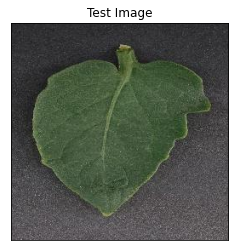

In [57]:
import cv2
image_path = "test/test/TomatoHealthy2.JPG"
#Reading Image
img = cv2.imread(image_path)
if img is None:
    raise ValueError(f"Image not found or could not be Loaded from {image_path}")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #convert BGR to RGB


#Displaying Image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [58]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])# convert single img to batch
print(input_arr.shape)

(1, 128, 128, 3)


In [59]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 444ms/step


(array([[8.0671680e-06, 4.3176260e-05, 4.6299017e-05, 3.8284840e-04,
         1.9879564e-05, 1.5215293e-05, 5.5809446e-06, 1.7230657e-06,
         8.7724959e-07, 2.1083838e-06, 4.5491392e-06, 3.4351508e-06,
         2.6076686e-06, 4.4683782e-07, 8.2854036e-05, 6.2667362e-07,
         8.9831210e-06, 5.4432617e-06, 1.2978134e-06, 1.3161776e-05,
         1.3606877e-05, 5.1043894e-06, 2.0258241e-05, 5.6995464e-06,
         5.2617961e-06, 1.4683976e-03, 5.3988110e-06, 1.7681994e-05,
         1.8888953e-05, 5.3499589e-05, 6.3990674e-04, 6.3397907e-05,
         7.5653079e-05, 9.6010219e-05, 1.9394683e-02, 1.6033866e-06,
         2.8131013e-05, 9.7743773e-01]], dtype=float32),
 (1, 38))

In [60]:
result_index = np.argmax(prediction)
result_index

37

In [61]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

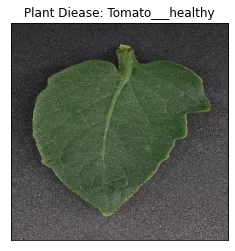

In [62]:
#Disply REsult
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f'Plant Diease: {model_prediction}')
plt.xticks([])
plt.yticks([])
plt.show()

In [63]:
model_prediction

'Tomato___healthy'

In [ ]:
## Some other matrix